<h1><center>MEEN 689 - ROBOTIC PERCEPTION ASSIGNMENT - 2</center></h1>

<center>Name: ARUNACHALAM VENKATACHALAM</center>
<center>UIN: 333000500</center>

**ASSUMPTIONS**
1. The robot only moves in the forward direction.
2. The robot moves only one step(1m) at a time in normal conditions.
3. Assuming the robot starts from the left most initial state (state 0 in my case).
4. Assume the path to be a loop, i.e, the successor of the the last state is the zeroth state, we must hardcode them as they could not be done during iteration.
5. The prior knowledge/belief at the start is assumed to be distributed equally likely within the given range,i.e, the prior belief = 1/100 = 0.01.
6. Assuming that the robot first moves and then measures.

**READ ME** <br>

To estimate the probability of a robot being at a new state requires information such as the previous estimation of robot being at a given state, the action model and the measurement model.<br>

We use the Bayes filter algorithm to recursively calculate belief $X_{t}$ from $X_{t-1}$ <br>

The action model and the measurement model was defined in the scope of this program. The action model remains the same in the whole process whereas the prior state and the measurement model changes with each timestep. <br>

Action model and the measurement model was hardcoded for the boundary conditions (for the first and the last steps).<br>

**Action model representation**: P($X_{i+1}$|$X_{i}$,$u_{i}$) assuming Markov property, where X is the position or state and u is the action (moving forward, staying at the same position, moving 1 step forward, moving 2 steps forward) <br>
**Measurement model representation**: P($Z_{i}$|$X_{i}$) assuming Markov property, where Z is the measurement and X is the current position <br>

Since we assume the path to be a loop, i.e, the successor of the the last state is the zeroth state, we must hardcode them as they could not be done during iteration. <br>

Assuming the robot starts from the left most initial state (state 0 in my case) <br>
Probability of moving backwards by 1m/1 step is 5%  - P($X_{i-1}$|$X_{i}$,$u_{i}$) = 0.05 <br>
Probability of staying at the same position is 5%   - P($X_{i}$|$X_{i}$,$u_{i}$) = 0.05 <br>
Probability of moving to the next state/1m forward is 80%  - P($X_{i+1}$|$X_{i}$,$u_{i}$) = 0.80 <br>
Probability of moving 2 steps/2 m at the same time is 10%  - P($X_{i+2}$|$X_{i}$,$u_{i}$) = 0.10 <br>

Measurement model : <br>
Probability of sensor measuring the wrong location is 10%  - P($Z_{y}$|$X_{i}$) = 0.1 where i!=y <br>
Probability of sensor measuring the correct location is 90% - P($Z_{i}$|$X_{i}$) = 0.9 <br>

**LOGIC FOR ACTION_ARRAY CODE:** <br>

Action array is a 100x100 2D array <br>

100 rows represent hundred 1m spaces where the action model is implemented for different timesteps. For example, in the 1st time step which involves the movement from 0th state to the 1st state (movement from the 0th column to the 1st column as per the logic of my code), the 1st(index value = 0) row represents the probability values for the robot to be in a particular state according to the action model. <br>

100 columns represent the 100m movement space where the actual movement of the robot takes place between different states along with the inherent probability values assocaited with the movements. <br>

At any certain time I'm fixing the row, thus any operation(forward, backward) with respect to the motion of the car happens in a 1D space with alterations to the column values. <br>

**LOGIC FOR MEASUREMENT_ARRAY CODE:** <br>

Measurement array is a 100x100 2D array <br>

100 rows represent hundred 1m spaces where the measurement model is implemented for different timesteps. For example, in the 1st time step which involves the movement measurement from 0th state to the 1st state (movement measurement from the 0th column to the 1st column as per the logic of my code), the 0th row represents the probability values for the robot to be in a particular state according to the measurement model - the first column in the first row must be 0.8. <br>

100 columns which represent the 100m movement space where the actual movement of the robot takes place between different states along with the inherent probability values assocaited with the movements. <br>

**INITIAL PRIOR KNOWLEDGE** : Initially the prior knowledge of the robot being at a state (location in the world) was considered to be spread equally likely over the full space and was defined as "belief_state = np.full(100,0.01)" <br>

**PREDICTION** : Then we go ahead with the prediction which tells you the probability for the movement from previous posotion to your current position due to performance of an action. Here we predict the probability of moving to the consecutive state from the current state for the whole time step for all the given states given the robot does an action. The summation of the probabilities for each state is calculated and this gives you the possibility of being at the state at that particular time step irrespective of your start position. <br>
This is defined as "bel_bar = np.dot(belief_state,action_array)"; np.dot multiplies the elements of the array and sums it. <br> 

**MEASUREMENT UPDATE/INTERNAL BELIEF** : After knowing the probabilities of being at a particular state at a given timestep post making a move/action(Prediction), we multiply this probability with the measurement model(sensor model data) to end up at the internal belief of the robot being at a particular state at that given timestep.<br>

This is defined as "y = np.multiply(bel_bar,measurement_array[j])"; np.multiply function does element to element multiplication. <br>

**NORMALIZATION** : The normalization factor (norm_fact) is calculated by dividing the sum of beliefs. This is defined as "norm_fact = 1 / (np.sum(y))"

**ACTUAL BELIEF** : We multiply the internal belief with the normalization factor to get the probabilities within the range (<1). This is defined as "belief_state = norm_fact * y"

This actual belief gets updated for each timestep and the actual belief of current state would be used as the prior belief for the next consecutive state (i.e. during the transformation from the current to the next consecutive state). 

In [45]:
x = int(input("Enter the number of timesteps you want:"))

Enter the number of timesteps you want:50


In [46]:
#ACTION MODEL
import numpy as np
action_array= np.zeros((100,100))
for i in range(100):
#When the robot is transitioning from 0th state to the 1st 
    if i==0:
        action_array[i][99]=0.05    
        action_array[i][0]=0.05       
        action_array[i][1]=0.8        
        action_array[i][2]=0.1        
#When the robot is transitioning from 98th state to the 99th 
    elif i==98:
#When the robot is at the 98th state (98th row in the array, the row is fixed) the probability of it to move to the 97th column (one step back within the same row) is 0.05
        action_array[i][97]=0.05
#When the robot is at the 98th state (98th row in the array, the row is fixed) the probability of it to stay at the 98th column is 0.05    
        action_array[i][98]=0.05
#When the robot is at the 98th state (98th row in the array, the row is fixed) the probability of it to move to the 99th column (one step forward within the same row) is 0.80    
        action_array[i][99]=0.8
#When the robot is at the 98th state (98th row in the array, the row is fixed) the probability of it to move to the 0th column (two step forward within the same row) is 0.10
        action_array[i][0]=0.1
    elif i==99:
        action_array[i][98]=0.05
        action_array[i][99]=0.05
        action_array[i][0]=0.8
        action_array[i][1]=0.1
    else:
        action_array[i][i-1]=0.05
        action_array[i][i]=0.05
        action_array[i][i+1]=0.8
        action_array[i][i+2]=0.1
        
#MEASUREMENT MODEL
measurement_array= np.ones((100,100))*0.1       
for i in range(100):
#When the robot is making a transition from state 0 to state 1, the measurement model should produce (Z1|X1)=0.9 as we assume the robot would be in state 1 at the end of timestep1
    if i==0:
#Thus the value of state 1(column 1), caused by the transition from state 0 to state 1, must be 0.9 while the values of other states must be 0.1
        measurement_array[i][1]=0.9             
    elif i==99:
        measurement_array[i][0]=0.9
    else:
        measurement_array[i][i+1]=0.9

In [47]:
dummy=np.zeros((x,100))
bel_bar=0
belief_state = np.full(100,0.01)
for j in range(0,x):
    #PREDICTION 
    bel_bar = np.dot(belief_state,action_array)
    #measurement_array[j+1]= 0.9
    y = np.multiply(bel_bar,measurement_array[j])
    #NORMALISING FACTOR
    norm_fact = 1 / (np.sum(y))
    print(norm_fact)
    #BELIEF OF STATE
    belief_state = norm_fact * y
    dummy[j]=belief_state
    if j<51:
        print(belief_state)
    #measurement_array[j+1]= 0.1

9.259259259259256
[0.00925926 0.08333333 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926 0.00925926
 0.00925926 0.00925926 0.00925926 0.00925926

In [48]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


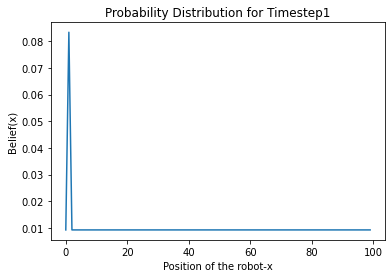

In [49]:
#BELIEF OF TIMESTEP1
import matplotlib.pyplot as plt
#from scipy.interpolate import interp1d
x = range(0,100)
y = dummy[0]
#f3 = interp1d(x, y, kind='quadratic')
plt.plot(x,y)
plt.xlabel("Position of the robot-x")
plt.ylabel("Belief(x)")
plt.title("Probability Distribution for Timestep1")
plt.show()

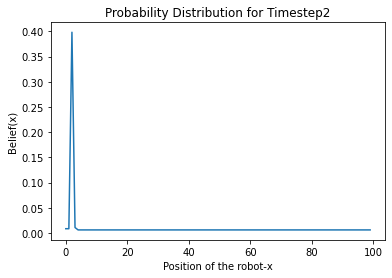

In [50]:
#BELIEF OF TIMESTEP2
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = range(0,100)
y = dummy[1]
#f3 = interp1d(x, y, kind='quadratic')
plt.plot(x,y)
plt.title("Probability Distribution for Timestep2")
plt.xlabel("Position of the robot-x")
plt.ylabel("Belief(x)")
plt.show()

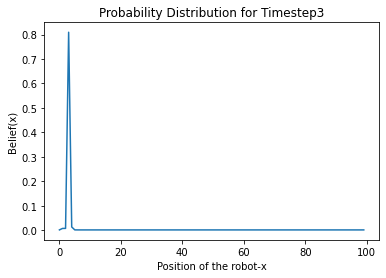

In [51]:
#BELIEF OF TIMESTEP3
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = range(0,100)
y = dummy[2]
#f3 = interp1d(x, y, kind='quadratic')
plt.plot(x,y)
plt.title("Probability Distribution for Timestep3")
plt.xlabel("Position of the robot-x")
plt.ylabel("Belief(x)")
plt.show()

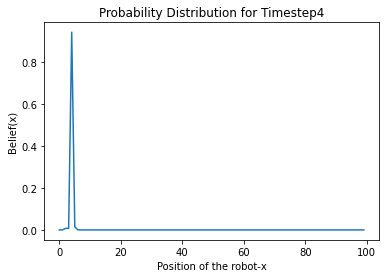

In [52]:
#BELIEF OF TIMESTEP4
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = range(0,100)
y = dummy[3]
#f3 = interp1d(x, y, kind='quadratic')
plt.plot(x,y)
plt.title("Probability Distribution for Timestep4")
plt.xlabel("Position of the robot-x")
plt.ylabel("Belief(x)")
plt.show()

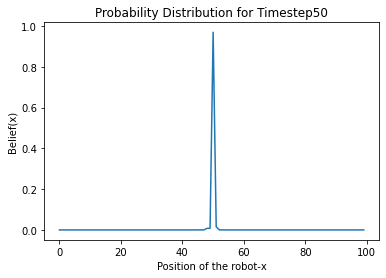

In [53]:
#FOR TIMESTEPS UPTO 50
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
x = range(0,100)
y = dummy[49]
#f3 = interp1d(x, y, kind='quadratic')
plt.plot(x,y)
plt.title("Probability Distribution for Timestep50")
plt.xlabel("Position of the robot-x")
plt.ylabel("Belief(x)")
plt.show()

**GRAPH DESCRIPTION/EXPLANATION**:

For any timestep n, the probability of the robot to be at the pos(n) will be the highest. Since we assumed the robot to start at the leftmost(0th position), it is natural that after n timesteps the robot would be at the $n^{th}$ position. And there would be some probability for the robot to be at the $(n-1)^{th}$,$(n+1)^{th}$, and $(n-2)^{nd}$ positions as per the problem statement, and it could also be seen in the graph.